# Aplicando PCA a imagenes

In [18]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
im = imageio.imread('.//imagenes/s3/3.pgm')
im = im.astype(np.uint8)
print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


/tmp/ipykernel_19168/541141317.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('.//imagenes/s3/3.pgm')


Se puede observar los valores maximos y minimos de los pixeles de las imagenes.

In [29]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


Para poder realizar PCA, se deben normalizar los valores.

In [30]:
original_im = im
im = im/255 # Se divide por este valor, ya que es el máximo que pueden tener los pixeles

In [31]:
print('Max normalizado', end = ' ')
print(np.amax(im))
print('Min normalizado', end = ' ')
print(np.amin(im))

Max normalizado 0.8
Min normalizado 0.0392156862745098


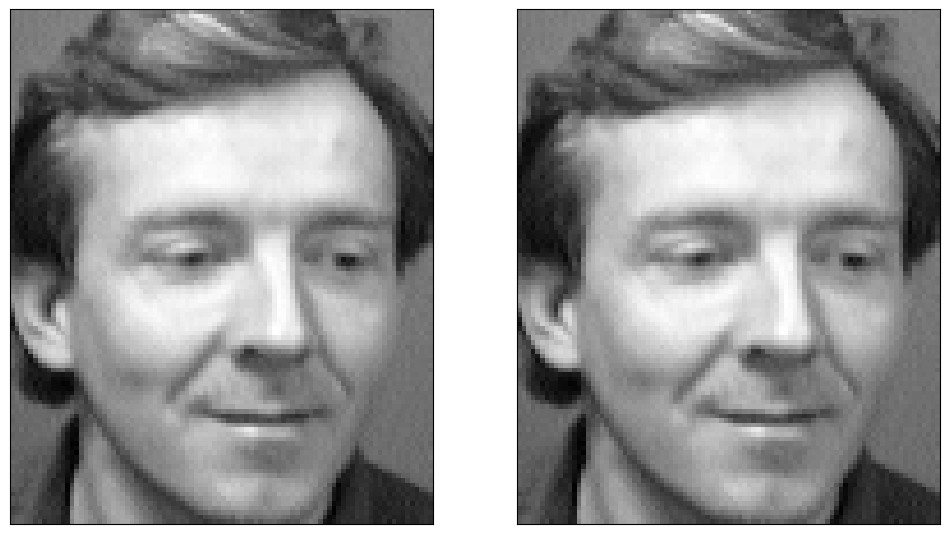

In [32]:
fig, ax = plt.subplots(1,2,figsize = (12,12),
                      subplot_kw={'xticks':[],'yticks':[]} ) # Estos parámetros se añaden para que no se vean los ejes de los graficos
ax[0].imshow(original_im,cmap='gray')
ax[1].imshow(im,cmap='gray')

/tmp/ipykernel_19168/1500435257.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)
/tmp/ipykernel_19168/1500435257.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)
/tmp/ipykernel_19168/1500435257.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)
/tmp/ipykernel_19168/1500435257.py:6: DeprecationWarnin

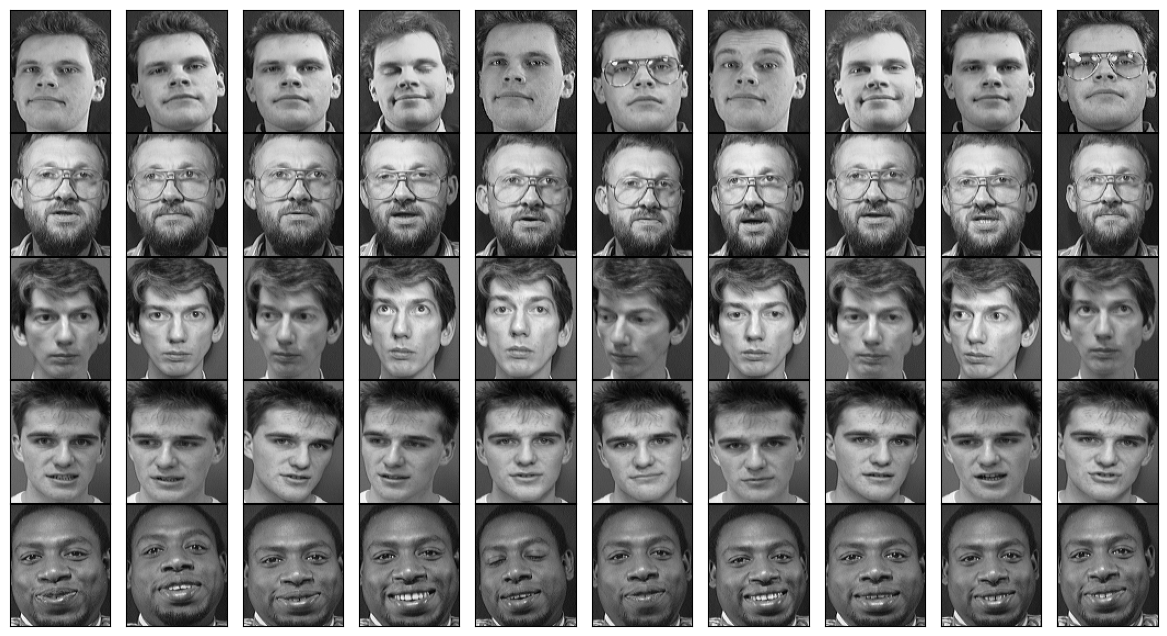

In [44]:
from glob import iglob

faces = pd.DataFrame([])

for path in iglob('.//imagenes/*/*.pgm'):
    im = imageio.imread(path)
    face = pd.Series(im.flatten(),name='path')
    faces = pd.concat([faces,face],axis=1)

faces = faces.T
    
fig, axes = plt.subplots(5,10,figsize=(15,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.iloc[i].values.reshape(112,92),cmap='gray')
    


In [48]:
from sklearn.decomposition import PCA

faces_pca = PCA(n_components=0.5) #Representación del 50% de los datos
faces_pca.fit(faces)

PCA(n_components=0.5)

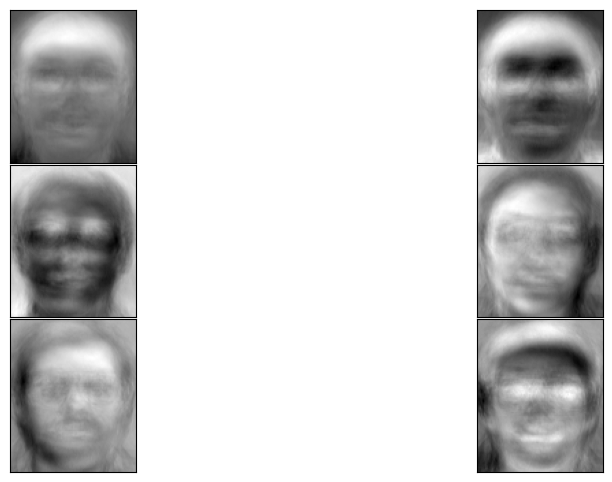

In [50]:
rows = 3
columns = faces_pca.n_components_ // rows

fig, axes = plt.subplots(rows,columns,figsize=(12,6),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(112,92),cmap='gray')
    

In [52]:
print(faces_pca.n_components_) # Esta es la cantidad de componentes principales para representar el 50% de los datos

6


In [55]:
components = faces_pca.transform(faces)
projection = faces_pca.inverse_transform(components)

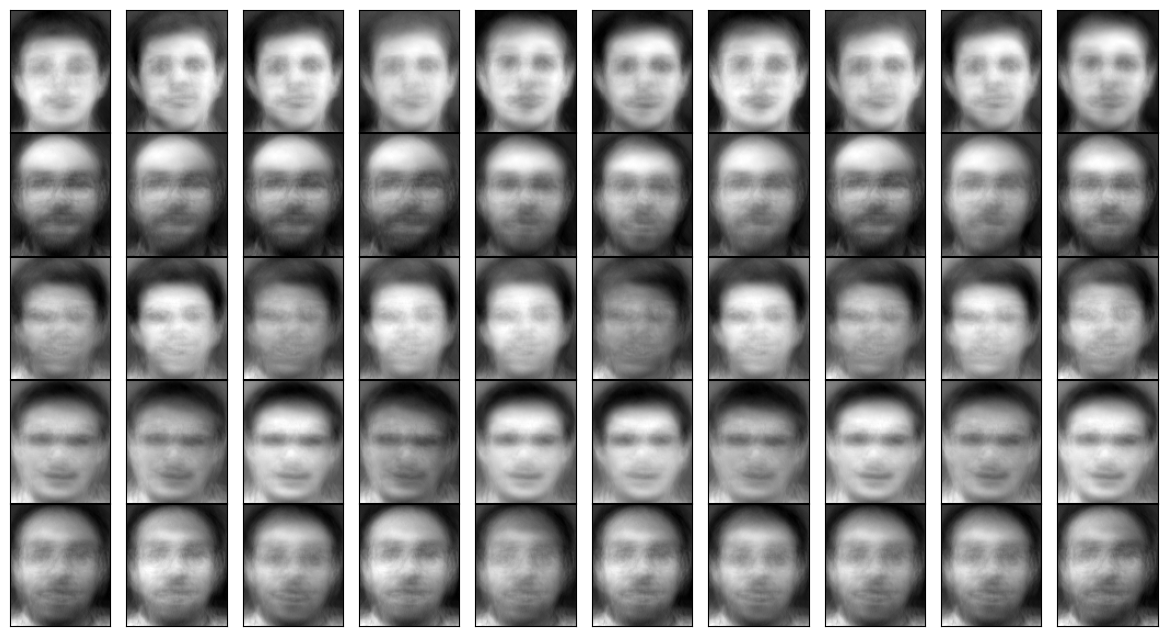

In [56]:
fig, axes = plt.subplots(5,10,figsize=(15,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projection[i].reshape(112,92),cmap='gray')

## Para representar el 80% de la información

In [57]:
faces_pca = PCA(n_components=0.8) #Representación del 50% de los datos
faces_pca.fit(faces)

PCA(n_components=0.8)

In [60]:
print(faces_pca.n_components_)

44


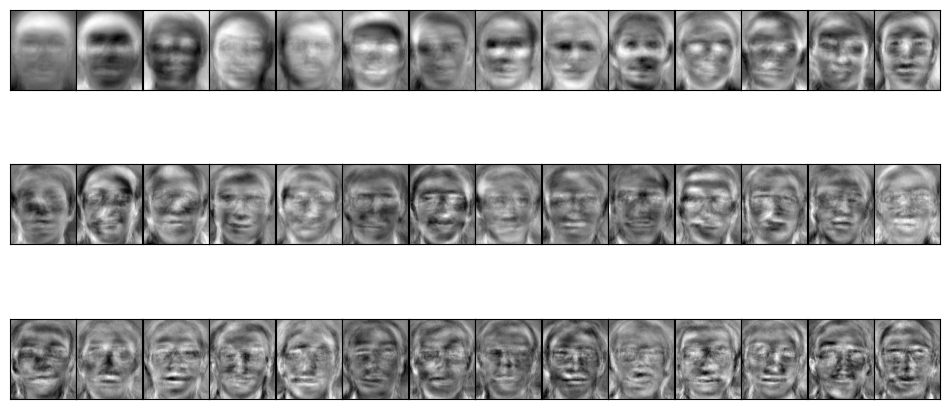

In [58]:
rows = 3
columns = faces_pca.n_components_ // rows

fig, axes = plt.subplots(rows,columns,figsize=(12,6),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(112,92),cmap='gray')

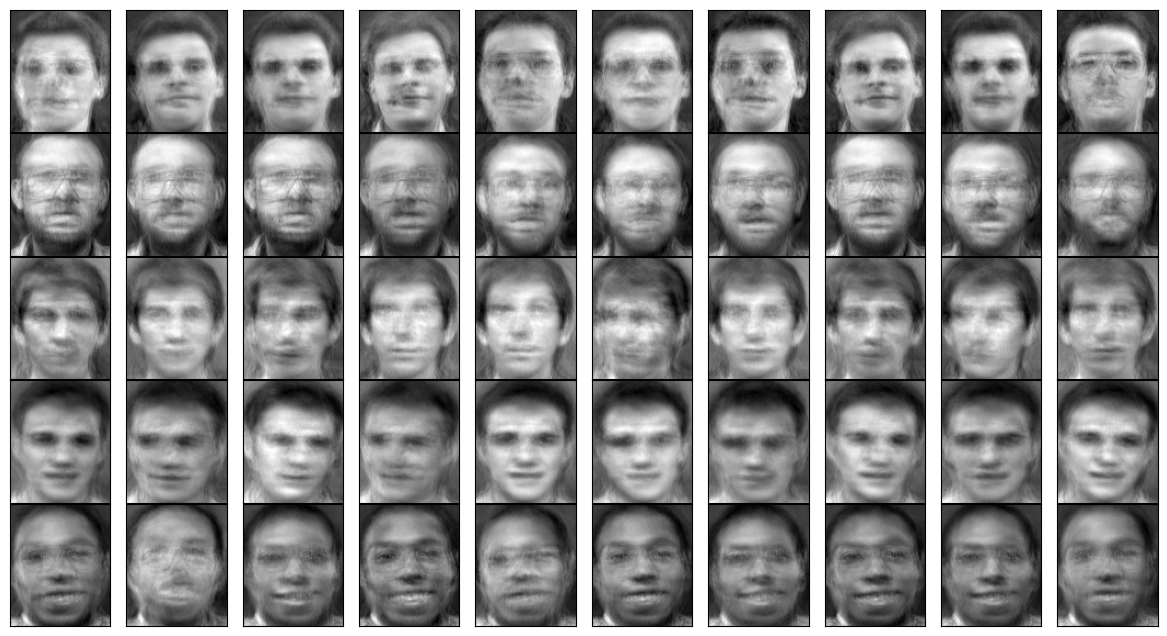

In [59]:
components = faces_pca.transform(faces)
projection = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(5,10,figsize=(15,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projection[i].reshape(112,92),cmap='gray')

## Para representar el 99% de la información 

In [61]:
faces_pca = PCA(n_components=0.999) #Representación del 50% de los datos
faces_pca.fit(faces)

PCA(n_components=0.999)

In [63]:
print(faces_pca.n_components_)

388


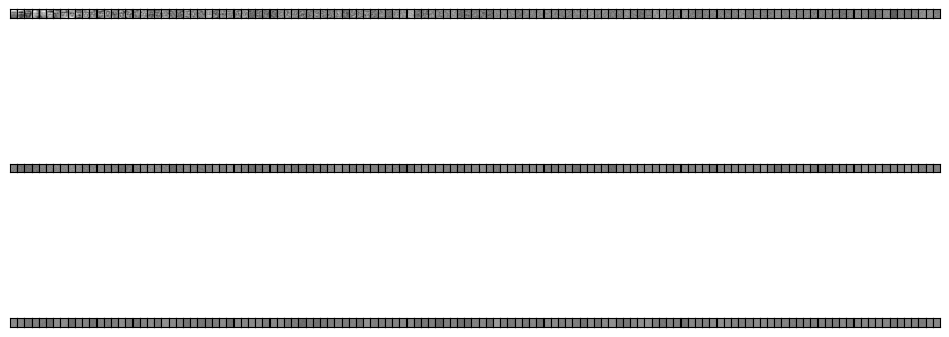

In [64]:
rows = 3
columns = faces_pca.n_components_ // rows

fig, axes = plt.subplots(rows,columns,figsize=(12,6),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(112,92),cmap='gray')

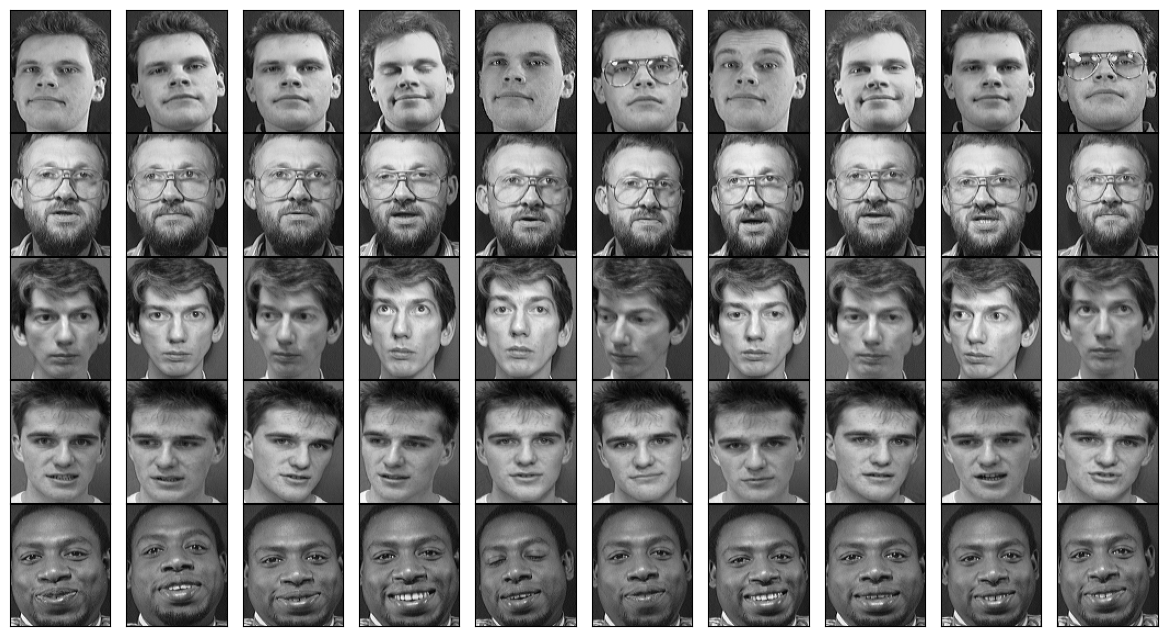

In [65]:
components = faces_pca.transform(faces)
projection = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(5,10,figsize=(15,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projection[i].reshape(112,92),cmap='gray')